# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris['data']
iris_species = iris['target_names']
print(iris_species)
iris_target = iris['target']
iris_features = iris['feature_names']
print(iris_species[0]+' samples: ', list(iris_target).count(0))
print(iris_species[1]+' samples: ', list(iris_target).count(1))
print(iris_species[2]+' samples: ', list(iris_target).count(2))
print(iris.keys())


['setosa' 'versicolor' 'virginica']
setosa samples:  50
versicolor samples:  50
virginica samples:  50
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Make a pair plot of the iris features colored by their true classification.

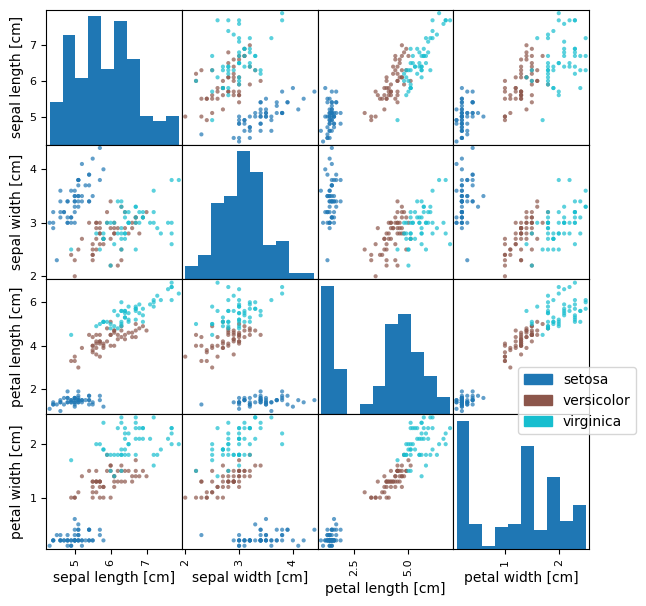

In [3]:
import pandas as pd

# copied from clustering.ipynb
df = pd.DataFrame(iris_data, columns=['sepal length [cm]', 'sepal width [cm]',
                                      'petal length [cm]', 'petal width [cm]'])
df['species'] = iris_target # add the target species

# create the scatter matrix per target species
pd.plotting.scatter_matrix(df.iloc[:, :4], figsize=(7, 7), alpha=0.7, c=df['species'],cmap='tab10')

# add a legend
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=plt.cm.tab10(i / 2), label=iris_species[i]) for i in range(3)]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1.4, 1.4))


plt.show()

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

/Users/estherpark/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/estherpark/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

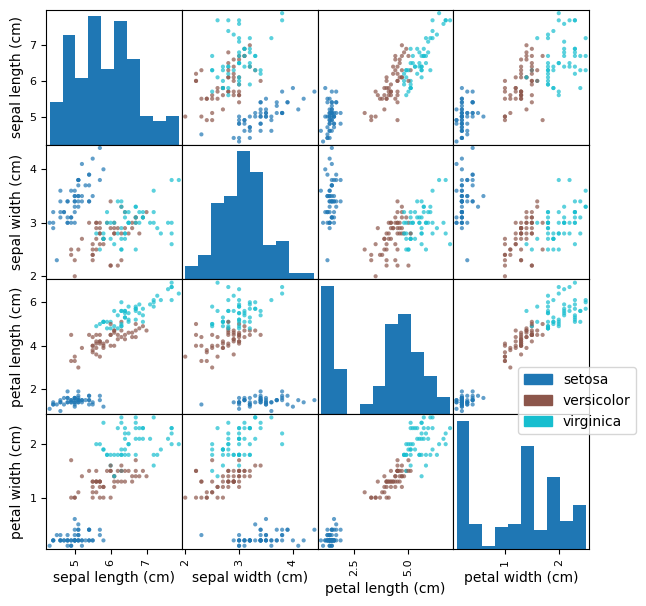

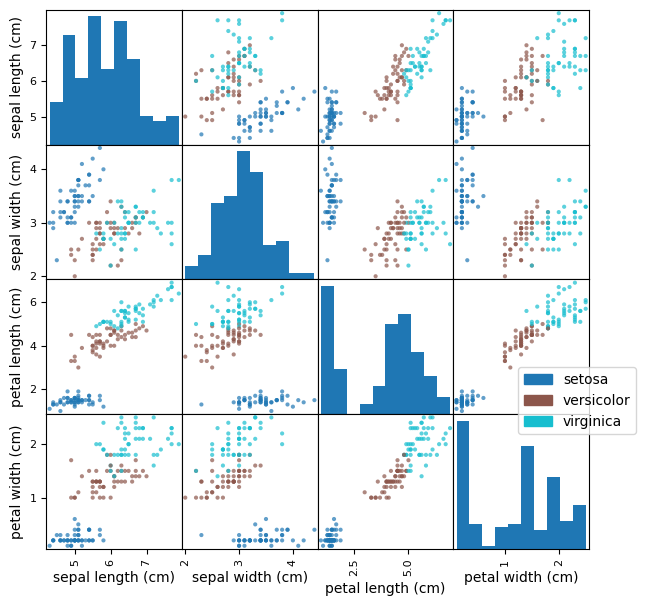

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler # for re-scaling if I did do it


# KNN models
knn3 = KNeighborsClassifier(n_neighbors=3)
knn10 = KNeighborsClassifier(n_neighbors=10)

knn3.fit(iris_data, iris_target)
knn10.fit(iris_data, iris_target)

# get the predictions for y
y_prediction3 = knn3.predict(iris_data)
y_prediction10 = knn10.predict(iris_data)


df3 = pd.DataFrame(iris_data, columns=iris_features)
df3['Predicted Species'] = y_prediction3

df10 = pd.DataFrame(iris_data, columns=iris_features)
df10['Predicted Species'] = y_prediction10

# scatter matrix for both predictions
pd.plotting.scatter_matrix(df3.iloc[:, :4], figsize=(7, 7), alpha=0.7, c=y_prediction3, cmap='tab10')
handles = [mpatches.Patch(color=plt.cm.tab10(i / 2), label=iris_species[i]) for i in range(3)]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1.4, 1.4))
plt.show()


pd.plotting.scatter_matrix(df10.iloc[:, :4], figsize=(7, 7), alpha=0.7, c=y_prediction10, cmap='tab10')
handles = [mpatches.Patch(color=plt.cm.tab10(i / 2), label=iris_species[i]) for i in range(3)]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1.4, 1.4))
plt.show()


*In this case you're training and testing your model using the same data set. Is that a good idea?*

I think that training and testing the model with the same data set is not a good idea because you already know the classifications of your data. The model would improve because you can determine whether the model is 100% wrong for each data it classifies, but realistically the training and testing data shouldn't be identical.

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

Accuracy of Cross Validation Prediction with KNN 5 Neighbor Model:  0.9733333333333334
Accuracy of Cross Validation Prediction with KNN 50 Neighbor Model:  0.9333333333333333


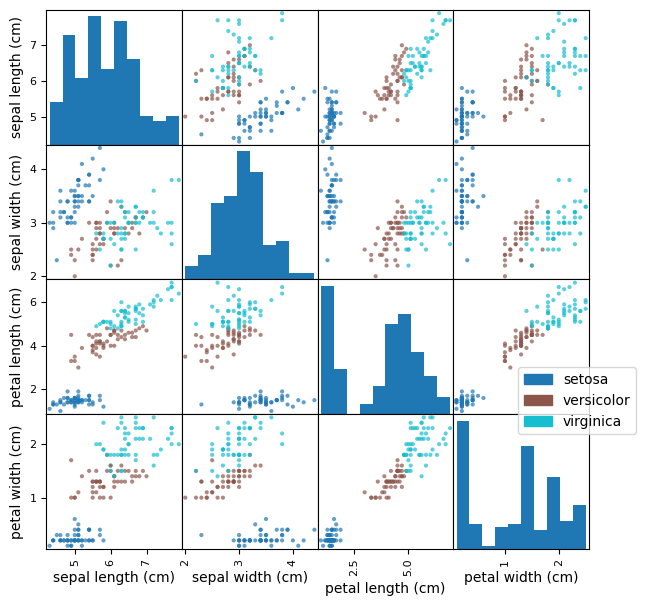

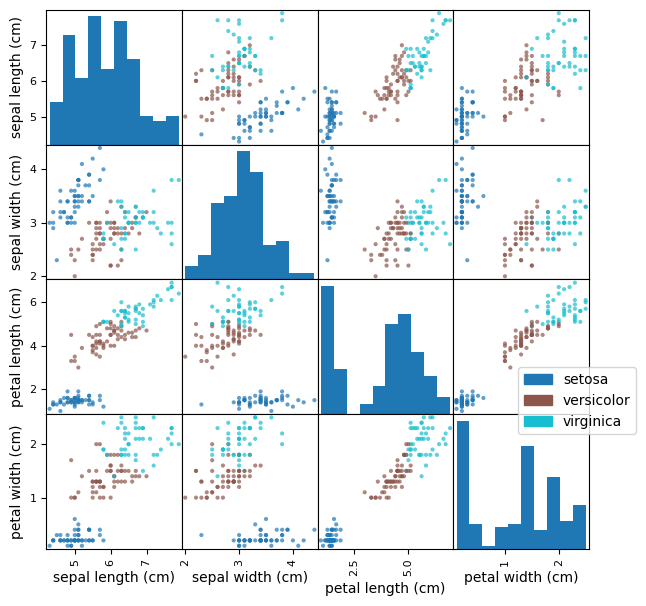

In [5]:
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

#iris = datasets.load_iris()
#iris_data = iris['data']
#iris_species = iris['target_names']
#iris_target = iris['target']
#iris_features = iris['feature_names']

# KNN model 5
knn5 = KNeighborsClassifier(n_neighbors=5)
iris_cvp5 = cross_val_predict(knn5, iris_data, iris_target, cv=5)
accuracy5 = np.sum((iris_cvp5==iris_target)/len(iris_target))
print("Accuracy of Cross Validation Prediction with KNN 5 Neighbor Model: ", accuracy5)

# KNN model 50
knn50 = KNeighborsClassifier(n_neighbors=50)
iris_cvp50 = cross_val_predict(knn50, iris_data, iris_target, cv=50)
accuracy50 = np.sum((iris_cvp50==iris_target)/len(iris_target))
print("Accuracy of Cross Validation Prediction with KNN 50 Neighbor Model: ", accuracy50)

# create the dataframes
df5 = pd.DataFrame(iris_data, columns=iris_features)
df5['Predicted Species'] = iris_cvp5

df50 = pd.DataFrame(iris_data, columns=iris_features)
df50['Predicted Species'] = iris_cvp50

# scatter matrix for KNN models
pd.plotting.scatter_matrix(df5.iloc[:, :4], figsize=(7, 7), alpha=0.7, c=iris_cvp5, cmap='tab10')
handles = [mpatches.Patch(color=plt.cm.tab10(i / 2), label=iris_species[i]) for i in range(3)]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1.4, 1.4))
plt.show()

pd.plotting.scatter_matrix(df50.iloc[:, :4], figsize=(7, 7), alpha=0.7, c=iris_cvp50, cmap='tab10')
handles = [mpatches.Patch(color=plt.cm.tab10(i / 2), label=iris_species[i]) for i in range(3)]
plt.legend(handles=handles, loc='best', bbox_to_anchor=(1.4, 1.4))
plt.show()

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [6]:
completeness = {}
purity = {}

for species in range(3):
    true_positive = np.sum((iris_cvp50 == species) & (iris_target == species))

    actual_positive = np.sum(iris_target == species)

    predicted_positive = np.sum(iris_cvp50 == species)

    comp = true_positive / actual_positive if actual_positive != 0 else 0 # prevent division by 0 warning
    pur = true_positive / predicted_positive if predicted_positive != 0 else 0

    completeness[species] = comp
    purity[species] = pur

for species in range(3):
    print(f"Species {species}: Completeness = {completeness[species]:.3f}, Purity = {purity[species]:.3f}")

Species 0: Completeness = 1.000, Purity = 1.000
Species 1: Completeness = 0.960, Purity = 0.857
Species 2: Completeness = 0.840, Purity = 0.955


*Do your numbers make sense? Use the plot above to explain.*\

$\Rightarrow$ Based on the plot above, it looks like my numbers seem accurate. Species 0, or the Setosa is the most separated cluster so it must be easy for the model to classify the Setosa data. It makes sense that species 1 and 2 have similar completeness-purity because their clusters are intertwined, and the model must make more mistakes when the data have more in common. 

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

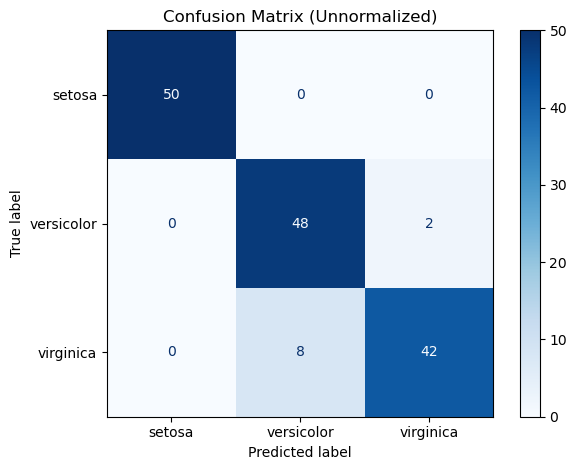

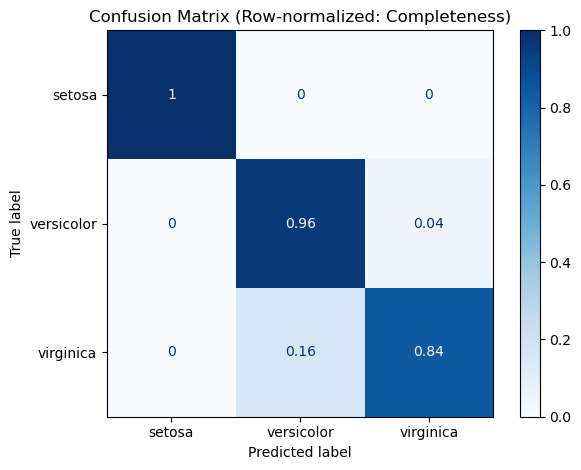

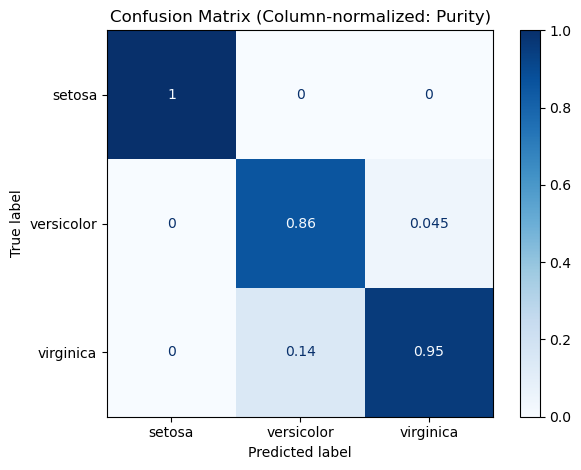

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

# defining the titles early so that I can use a for loop for plotting
normalizations = [(None, "Confusion Matrix (Unnormalized)"),
                  ('true', "Confusion Matrix (Row-normalized: Completeness)"),
                  ('pred', "Confusion Matrix (Column-normalized: Purity)")]

# the absolutely confusing matrices
for norm, title in normalizations:
    disp = ConfusionMatrixDisplay.from_predictions(iris_target, iris_cvp50, display_labels=iris_species,
                                                   cmap=plt.cm.Blues, normalize=norm)
    disp.ax_.set_title(title)
    plt.tight_layout()
    plt.show()


*Which plot(s) is/are most useful, and why?*

$\Rightarrow$ The column normalized plots are the most useful to me because I don't know the weight of having a matrix value of 50, whereas 1 means 100% complete/pure.